## CASE STUDY ON REGRESSION

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

### Load Dataset

In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\DSA\datasets\car_age_price.csv')

### Exploratory Data Analysis

In [3]:
#view the first few entries

df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
#view the last few entries

df.tail()

,Year,Price
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000
111,2015,425000


In [5]:
#Print the number of rows and columns of the dataset

df.shape

(112, 2)

In [6]:
## Checking the datatypes of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
#statistical analysis

df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [8]:
# check for null values

df.isna().sum()

Year     0
Price    0
dtype: int64

There are no null values in our dataset

In [9]:
## value counts

df.Year.value_counts()

2017    47
2015    22
2019    12
2018    11
2016     6
2014     6
2020     4
2013     4
Name: Year, dtype: int64

Maximum number of sales are in 2017

### Data Visualization

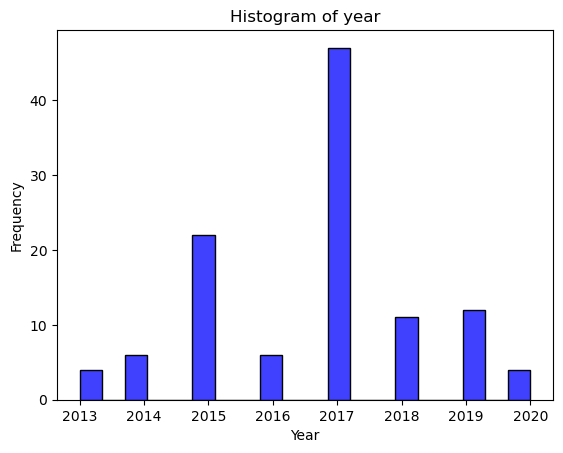

In [10]:
# Histogram of Year Vs Frequency

sns.histplot(df['Year'], bins=20, kde=False, color='blue')
plt.title('Histogram of year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

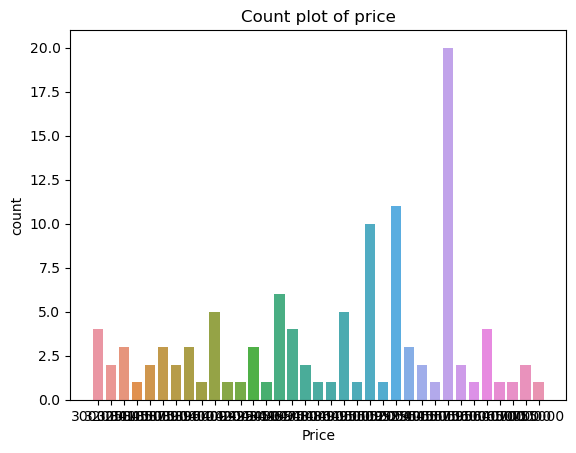

In [16]:
sns.countplot(x=df['Price']);
plt.title('Count plot of price')
plt.plot();

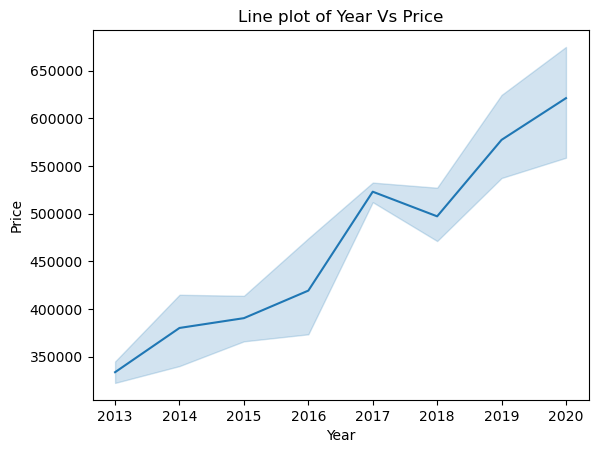

In [15]:
sns.lineplot(x='Year',y='Price', data=df)
plt.title('Line plot of Year Vs Price')
plt.plot();

From the plots we can analyze that,

1. The price of car increases with year

2. The maximum number of sales are happened in 2017 and lowest is with 2013 and 2020

3. Eventhough the car sales are decreased in 2020, the highest sale price is in 2020


### Checking for outliers

<Axes: xlabel='Year', ylabel='Price'>

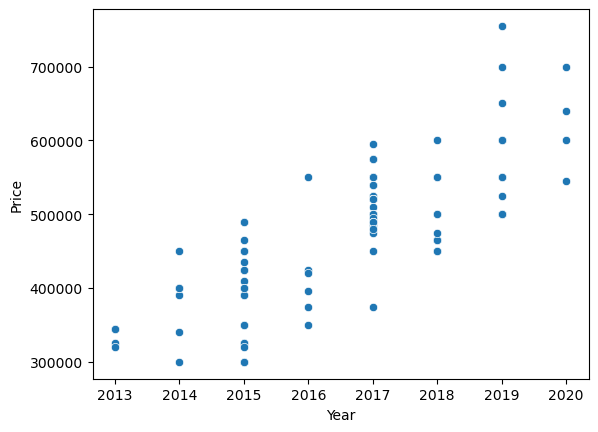

In [17]:
sns.scatterplot(x='Year',y='Price',data=df)

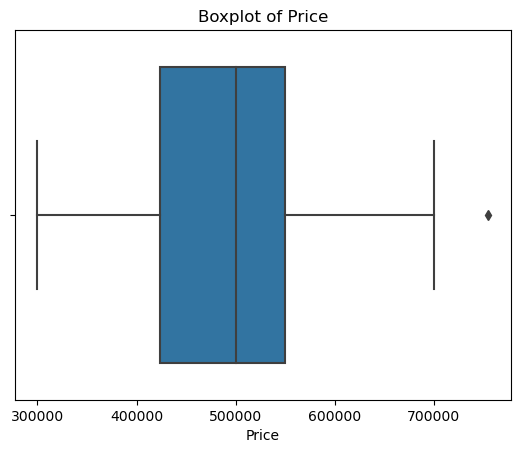

In [18]:
sns.boxplot(data=df, x='Price')
plt.title('Boxplot of Price')
plt.show()

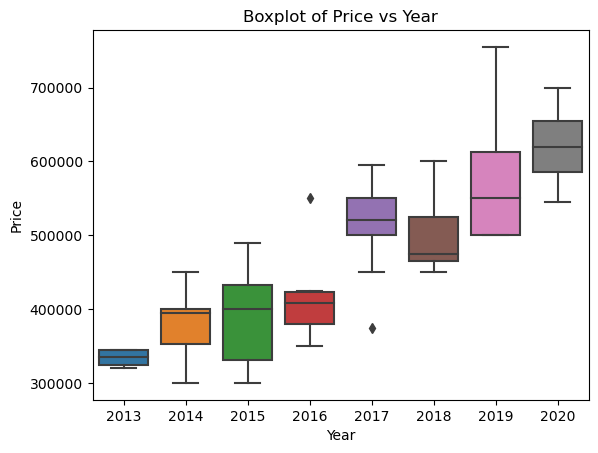

In [19]:
sns.boxplot(data=df, x='Year',y='Price')
plt.title('Boxplot of Price vs Year')
plt.show()

### Correlation Heatmap

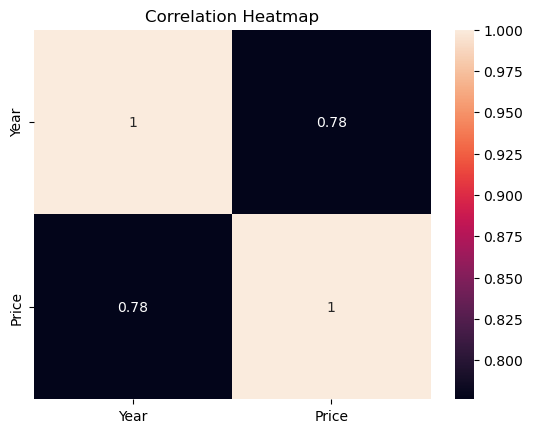

In [20]:
sns.heatmap(data=df.corr(),annot=True) 
plt.title('Correlation Heatmap')
plt.show()

### Data Preprocessing

In [21]:
#Creating dataframe for features
X = df[['Year']]

#Creating dataframe for target
y = df['Price']

In [22]:
print(X.shape,y.shape)

(112, 1) (112,)


In [23]:
#Splitting the dataset into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(89, 1) (23, 1) (89,) (23,)


### Model Building and Evaluation

Using four models for Regression, we can predict the possible price of the car

1. Linear Regression

2. Lasso Regression

3. Random Forest

### Linear Regression

In [24]:
# Create a Linear Regression model
lr_model = LinearRegression()

# Train the model on the training set
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test) 
y_pred

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [25]:
accuracy_lr = lr_model.score(X_test, y_pred)
print(accuracy_lr)

1.0


In [26]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error #MAE

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Assuming y_pred and y_test are NumPy arrays or similar data structures
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE: {rmse:.2f}')

from sklearn.metrics import r2_score
# Assuming y_pred and y_test are NumPy arrays or similar data structures
r2 = r2_score(y_test, y_pred)

print(f'R^2 Score: {r2:.2f}')

Mean Absolute Error: 53534.77957001264
Mean Squared Error: 4326906256.829671
RMSE: 65779.22
R^2 Score: 0.37


In [27]:
# Extract coefficients #y =mx+c
slope = lr_model.coef_[0] #slope = m
intercept = lr_model.intercept_ #c

# Display intercepts
print(f'Slope: {slope}')
print(f'Y-Intercept: {intercept}')

Slope: 47608.5678080766
Y-Intercept: -95520922.49198584


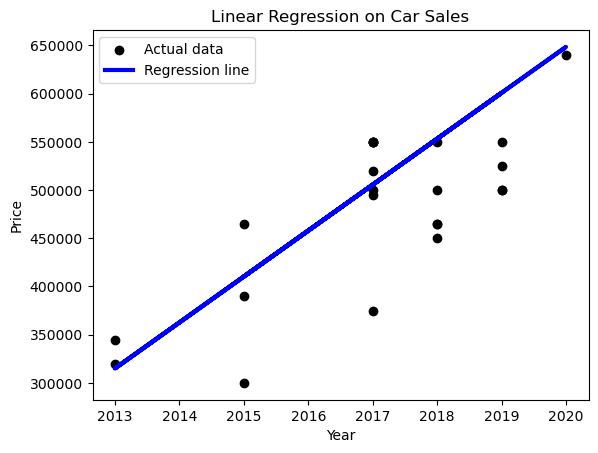

In [28]:
# Plot the original data and the regression line
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression on Car Sales')
plt.legend()
plt.show()

In [29]:
# define new data
year = [2022]
# make a prediction
pred = lr_model.predict([year])
# summarize prediction
print('Predicted:%3f' % pred)

Predicted:743601.615945


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Lasso Regression

In [30]:
# Create a Linear Regression model
lar_model = Lasso(alpha=1.0)

# Train the model on the training set
lar_model.fit(X_train, y_train)

# Make predictions on the test set
yr_pred = lar_model.predict(X_test) 
yr_pred

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507493, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507493, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507493, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

In [31]:
accuracy_lar = lar_model.score(X_test, yr_pred)
print(accuracy_lar)

1.0


In [32]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error #MAE

mae = mean_absolute_error(y_test, yr_pred)
print(f'Mean Absolute Error: {mae}')

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, yr_pred)
print(f'Mean Squared Error: {mse}')

# Assuming y_pred and y_test are NumPy arrays or similar data structures
rmse = np.sqrt(mean_squared_error(y_test, yr_pred))

print(f'RMSE: {rmse:.2f}')

from sklearn.metrics import r2_score
# Assuming y_pred and y_test are NumPy arrays or similar data structures
r2 = r2_score(y_test, yr_pred)

print(f'R^2 Score: {r2:.2f}')

Mean Absolute Error: 53534.33030898286
Mean Squared Error: 4326859771.015669
RMSE: 65778.87
R^2 Score: 0.37


In [33]:
# Extract coefficients #y =mx+c
slope = lar_model.coef_[0] #slope = m
intercept = lar_model.intercept_ #c

# Display intercepts
print(f'Slope: {slope}')
print(f'Y-Intercept: {intercept}')

Slope: 47608.15559950043
Y-Intercept: -95520091.24791843


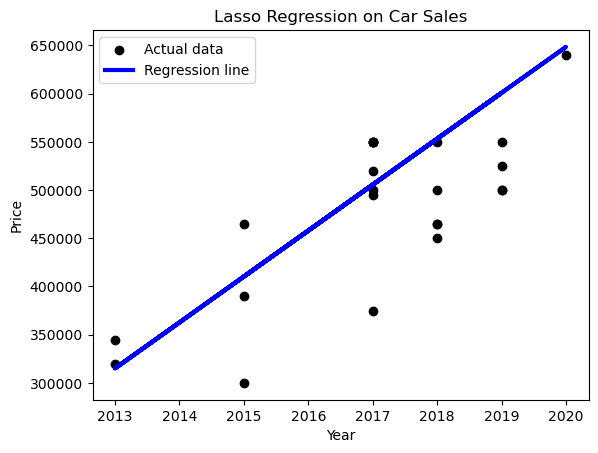

In [34]:
# Plot the original data and the regression line
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, yr_pred, color='blue', linewidth=3, label='Regression line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Lasso Regression on Car Sales')
plt.legend()
plt.show()

In [35]:
# define new data
year = [2022]
# make a prediction
pred = lar_model.predict([year])
# summarize prediction
print('Predicted:%3f' % pred)

Predicted:743599.374271


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


### Random Forest

In [36]:
rf_model = RandomForestRegressor(n_estimators= 100, max_depth=25) #Instantiate an object

rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = lr_model.predict(X_test) 

In [38]:
accuracy_dr = rf_model.score(X_test, rf_pred)
accuracy_dr

0.8907521513782205

In [42]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error #MAE

mae = mean_absolute_error(y_test, rf_pred)
print(f'Mean Absolute Error: {mae}')

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, rf_pred)
print(f'Mean Squared Error: {mse}')

# Assuming y_pred and y_test are NumPy arrays or similar data structures
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print(f'RMSE: {rmse:.2f}')

from sklearn.metrics import r2_score
# Assuming y_pred and y_test are NumPy arrays or similar data structures
r2 = r2_score(y_test, rf_pred)

print(f'R^2 Score: {r2:.2f}')

Mean Absolute Error: 53534.77957001264
Mean Squared Error: 4326906256.829671
RMSE: 65779.22
R^2 Score: 0.37


In [41]:
# define new data
year = [2022]
# make a prediction
pred = rf_model.predict([year])
# summarize prediction
print('Predicted:%3f' % pred)

Predicted:613880.357143


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Conclusion

From this three models, we can analyze that

1. The performance of Linear regressor is measured using three evaluation matrics: Mean Absolute Error(MAE), Mean Squared Error(MSE), Root Mean squared error(RMSE). The result are as follows.
    
    Mean Absolute Error: 53534.77957001264
        
    Mean Squared Error: 4326906256.829671
        
    RMSE: 65779.22
        
    R^2 Score: 0.37
        

2.  The performance of Lasso Regressor is measured using three matrices and the results are:
    
    Mean Absolute Error: 53534.33030898286
        
    Mean Squared Error: 4326859771.015669
        
    RMSE: 65778.87
        
    R^2 Score: 0.37
        
        
3.  The performance of Random forest Regressor is measured using three matrices and the results are:
   
    Mean Absolute Error: 53534.77957001264
        
    Mean Squared Error: 4326906256.829671
        
    RMSE: 65779.22
        
    R^2 Score: 0.37
        
Based on the results, Lasso Regressor has the best performance in terms of accuracy ,with the lowest MAE,MSE,RMSE Values
    